In [31]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For statistical data visualization
from sklearn.datasets import make_classification  # For generating a toy dataset
from sklearn.preprocessing import StandardScaler , MinMaxScaler  # For feature scaling
from sklearn.model_selection import train_test_split , GridSearchCV  # For splitting data into training and testing sets
from sklearn.neighbors import KNeighborsClassifier  # For Support Vector Classification
from sklearn.metrics import classification_report  # For evaluating classification performance


In [32]:
X = make_classification(n_classes=2, n_features=5, n_samples=1000 )
df = pd.DataFrame(X[0] , columns=[f"col{i}" for i in range(5)])
df['target'] = X[1]
df

,col0,col1,col2,col3,col4,target
0,-0.332371,-0.938726,-1.482916,1.390731,-2.166139,0
1,-0.303546,0.103607,-0.508071,0.454951,-0.305217,0
2,-0.209468,-0.097975,-1.083424,1.019861,-1.659446,0
3,-1.570852,-0.128805,-1.345674,1.117907,0.958233,0
4,-0.860641,0.571718,-0.654257,0.532516,0.689120,0
...,...,...,...,...,...,...
995,-0.219177,-1.075243,-0.710679,0.659699,-0.900144,0
996,1.143218,1.570051,1.041493,-0.873449,-0.574493,0
997,-0.354913,-0.755756,-1.812650,1.705799,-2.766112,0
998,-0.275420,-0.320704,-0.040019,0.007278,0.555354,0


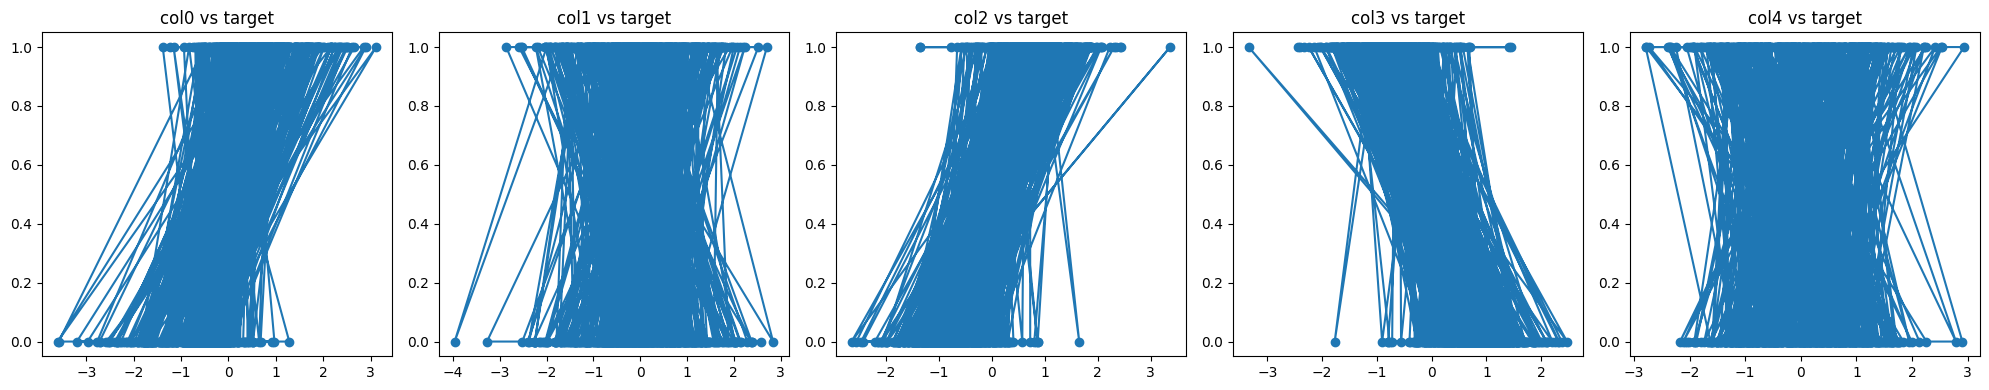

In [43]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, col in enumerate(df.drop('target', axis=1).columns):
    axes[i].plot(df[col], df['target'], marker='o', linestyle='-')
    axes[i].set_title(f'{col} vs target')

plt.tight_layout()
plt.show()

<Axes: >

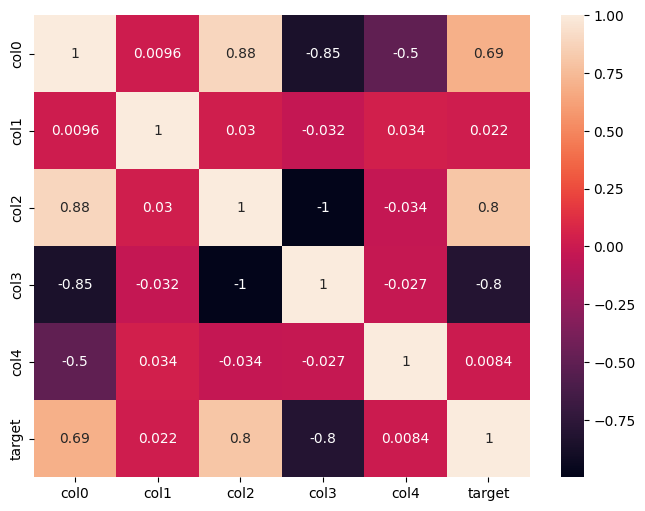

In [33]:
plt.figure(figsize=(8 , 6))
sns.heatmap(df.corr() , annot = True)

In [34]:
for i in df.drop('target' , axis=1).columns:
    df[i] = StandardScaler().fit_transform(df[[i]])

In [35]:
paramgrid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
    
}

In [36]:
model = KNeighborsClassifier()

In [37]:
grid = GridSearchCV(model , param_grid=paramgrid , cv=5)
grid.fit(df.drop('target' , axis=1) , df['target'])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [38]:
grid.best_params_

{'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}

In [39]:
xtrain , xtest , ytrain , ytest = train_test_split(df.drop('target' , axis=1) , df['target'] , test_size=0.2 , random_state=42)

In [40]:
clf = KNeighborsClassifier(n_neighbors=5 , p=1 , weights='uniform')
clf.fit(xtrain , ytrain)
ypredtrain = clf.predict(xtrain)
ypredtest = clf.predict(xtest)

In [41]:
print(classification_report(ytest , ypredtest))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       110
           1       0.91      0.89      0.90        90

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



In [42]:
print(classification_report(ytrain , ypredtrain))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       390
           1       0.96      0.93      0.95       410

    accuracy                           0.94       800
   macro avg       0.95      0.95      0.94       800
weighted avg       0.95      0.94      0.95       800

